In [27]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [28]:
releases = requests.get('https://api.github.com/repositories/158637354/releases')

In [29]:
releases

<Response [200]>

In [30]:
releases.json()

[{'url': 'https://api.github.com/repos/lightning-power-users/node-launcher/releases/15410793',
  'assets_url': 'https://api.github.com/repos/lightning-power-users/node-launcher/releases/15410793/assets',
  'upload_url': 'https://uploads.github.com/repos/lightning-power-users/node-launcher/releases/15410793/assets{?name,label}',
  'html_url': 'https://github.com/lightning-power-users/node-launcher/releases/tag/5.6.0',
  'id': 15410793,
  'node_id': 'MDc6UmVsZWFzZTE1NDEwNzkz',
  'tag_name': '5.6.0',
  'target_commitish': 'master',
  'name': '5.6.0 Move testnet to settings',
  'draft': False,
  'author': {'login': 'PierreRochard',
   'id': 6299681,
   'node_id': 'MDQ6VXNlcjYyOTk2ODE=',
   'avatar_url': 'https://avatars2.githubusercontent.com/u/6299681?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/PierreRochard',
   'html_url': 'https://github.com/PierreRochard',
   'followers_url': 'https://api.github.com/users/PierreRochard/followers',
   'following_url': 'https://a

In [31]:
releases = releases.json()

In [32]:
release_stats = []
for release in releases:
    stats = {}
    stats['date'] = release['published_at']
    stats['version'] = release['tag_name']
    try:
        mac_version = [a for a in release['assets'] if a['name'].endswith('.app.zip')][0]
        stats['macos_downloads'] = mac_version['download_count']
    except IndexError:
        print(stats)
    try:
        win_version = [a for a in release['assets'] if a['name'].endswith('.exe')][0]
        stats['windows_downloads'] = win_version['download_count']
    except IndexError:
        print(stats)
    release_stats.append(stats)

{'date': '2018-11-25T16:56:11Z', 'version': '2.0'}
{'date': '2018-11-24T20:11:59Z', 'version': '1.0', 'macos_downloads': 10}


In [33]:
release_stats

[{'date': '2019-02-07T02:27:08Z',
  'version': '5.6.0',
  'macos_downloads': 33,
  'windows_downloads': 63},
 {'date': '2019-02-06T14:17:12Z',
  'version': '5.5.1',
  'macos_downloads': 22,
  'windows_downloads': 42},
 {'date': '2019-02-04T19:15:19Z',
  'version': '5.5.0',
  'macos_downloads': 28,
  'windows_downloads': 107},
 {'date': '2019-01-30T02:04:48Z',
  'version': '5.4.1',
  'macos_downloads': 97,
  'windows_downloads': 169},
 {'date': '2019-01-28T02:48:50Z',
  'version': '5.4.0',
  'macos_downloads': 69,
  'windows_downloads': 109},
 {'date': '2018-12-18T17:18:45Z',
  'version': '5.3.0',
  'macos_downloads': 404,
  'windows_downloads': 728},
 {'date': '2018-12-10T23:26:29Z',
  'version': '5.1.1',
  'macos_downloads': 154,
  'windows_downloads': 214},
 {'date': '2018-12-10T21:55:44Z',
  'version': '5.1.0',
  'macos_downloads': 15,
  'windows_downloads': 27},
 {'date': '2018-12-09T21:04:49Z',
  'version': '5.0.3',
  'macos_downloads': 18,
  'windows_downloads': 64},
 {'date': '2

In [43]:
df = pd.DataFrame(release_stats)

In [46]:
df['date'] = pd.to_datetime(df['date']).apply(lambda x: x.date())

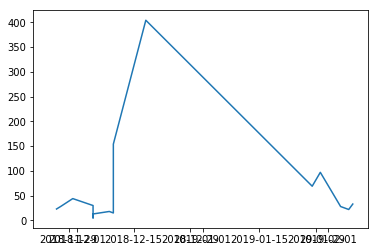

In [47]:
plt.plot(df['date'], df['macos_downloads'])


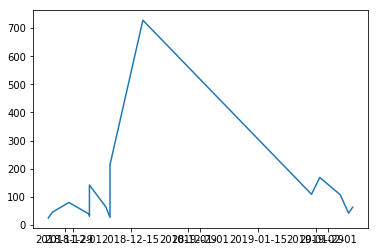

In [48]:
plt.plot(df['date'], df['windows_downloads'])

In [49]:
df

,date,macos_downloads,version,windows_downloads
0,2019-02-07,33.0,5.6.0,63.0
1,2019-02-06,22.0,5.5.1,42.0
2,2019-02-04,28.0,5.5.0,107.0
3,2019-01-30,97.0,5.4.1,169.0
4,2019-01-28,69.0,5.4.0,109.0
5,2018-12-18,404.0,5.3.0,728.0
6,2018-12-10,154.0,5.1.1,214.0
7,2018-12-10,15.0,5.1.0,27.0
8,2018-12-09,18.0,5.0.3,64.0
9,2018-12-05,13.0,5.0.2,142.0
